<a href="https://colab.research.google.com/github/consultantleonardoferreira/Projetos-em-Data-Science/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Portfólio de Projetos Data Science**
#**Case Airbnb - Cidade do Rio de Janeiro**
*by Leonardo Ferreira*

---
<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/consultantleonardoferreira/eds-enem-2018/master/rio-de-janeiro-809756_1920.jpg?token=AOVROUS7PQX3XPLX4XRRF5S65HPYQ">





### **Metodologia CRISP - DM**

O projeto utilizou-se da metodologia **CRISP-DM** (Cross Industry Process Model for Data Mining) adaptada para projetos em Data Science - DS (Análise Exploratória de Dados, Machine Learning, Deep Learning, dentre outras aplicações). A referida metodologia baseia-se em 06 (seis) etapas, a saber: Entendimento do Negócio, Entendimento dos Dados,  Preparação dos Dados, Construção dos Modelos, Avaliação e Implementação.

<img alt="Colaboratory logo" width="75%" src="https://raw.githubusercontent.com/consultantleonardoferreira/Projetos-em-Data-Science/master/crisphorizontal.png">

### **A. Entendendo o Negócio:** 

Nesta etapa serão estudados os objetivos do negócio, avaliada a situação negócio (quais problemas a serem resolvidos?), bem como determinado as metas e ou objetivos para o projeto de Data Science (quais objetivos e métricas de sucesso?)

**A1. Objetivos do Negócio.**

O [Airbnb](https://www.airbnb.com.br/) começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.

O site tem como missão tornar o compartilhamento fácil, agradável e seguro. Segundo a empresa:" Verificamos perfis pessoais e anúncios, mantemos um sistema de mensagens inteligente para que anfitriões e hóspedes possam se comunicar com segurança e gerenciamos uma plataforma confiável para recolher e transferir pagamentos".

No Brasil, o Airbnb está acumulando boas taxas de crescimento e, somente do começo de 2012 até agora, 90 mil diárias foram registradas através do serviço, um aumento de 1180% em comparação às 7 mil diárias computadas em 2011. Até o mês de abril, os hosts brasileiros lucraram aproximadamente 2,5 milhões pela plataforma e somente os hosts ativos do Rio de Janeiro lucraram, cada um, uma média de R$ 10 mil até a data do último levantamento.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**A2. Quais os problemas a serem resolvidos?**

No presente projeto busca-se resolver os seguintes problemas identificados pelo contratante do projeto em relação:

* Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
* Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
* Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
* Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
* Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?

**A3. Quais as métricas para aferição do sucesso do projeto de DS?**

* Respostas para as 5 (cinco) situações problemas apresentadas no item A2 considerando os dados disponibilizados pelo contratante, bem como integração com novas bases de dados a serem utilizadas na busca da solução dos problemas.






### **B. Entendendo os Dados:**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos dados, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.


##### **B1.Coletando os dados iniciais**

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções em *Data Science*.

Dessa forma, foi selecionado o arquivo (listings.csv) - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

In [1]:
# Carregando os pacotes do Python necessários à execução do Projeto de Data Science.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Carregando o dataset com informações da plataforma Airbnb.

df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

##### **B2. Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.



In [3]:
# Conhecendo o formato do dataset.

df.shape

(35870, 16)

Em uma análise inicial percebe-se que o dataset apresenta um total de **35870** linhas, entradas ou observações, bem como um total de **16** colunas, variáveis ou features. Sendo interessante a construção de um dicionário com o significado das variáveis para melhor compreensão do problema geral. Adicionalmente, é bastante interessante verificarmos os tipos das variáveis que integram nosso dataset: inteiras, float, objetos. Tal análise poderá indicar na fase de preparação dos dados a necessidade de transformações para melhor aplicação de técnicas de Data Science.

In [0]:
# Conhecendo as varíaveis e seus tipos.

display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel.
* `name` - nome da propriedade anunciada.
* `host_id` - número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - esta coluna não contém nenhum valor válido.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - informa o tipo de quarto que é oferecido.
* `price` - preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews` - número de reviews que a propriedade possui.
* `last_review` - data do último review.
* `reviews_per_month` - quantidade de reviews por mês.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

E por fim, nesta etapa, é interessante visualizarmos a estrutura do nosso dataset com suas linhas e colunas dispostos em forma tabular (Data Frame) com a possibilidade de identificação prematura de dados faltantes, possíveis valores discrepantes, dentre outras questões. É o primeiro contato com o dataset!

In [0]:
# Comando para visualizarmos as 5 primeiras linhas do Dataset.

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


In [0]:
# Comando para visualizarmos as 5 últimas linhas do Dataset.

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35865,43222409,Suíte fenomenal em mansão de luxo,27531233,Tiago,NaN,Itanhangá,-22.98356,-43.30366,Private room,64,2,0,NaN,NaN,5,336
35866,43222788,Quarto Casal Individual ARPOADOR / IPANEMA,62913860,Rodolfo,NaN,Ipanema,-22.98526,-43.19385,Private room,68,28,0,NaN,NaN,1,365
35867,43222989,Perto da praia? Aqui mesmo. Copacabana!,128128458,Marcia E,NaN,Copacabana,-22.97516,-43.19261,Entire home/apt,248,3,0,NaN,NaN,2,69
35868,43223062,Loft confortável para sua estadia.,344170057,Viviane & Jefferson,NaN,Leme,-22.96379,-43.17193,Entire home/apt,121,2,0,NaN,NaN,1,270
35869,43227835,Quarto confortável ao lado da Jeunesse Arena,125684729,Gustavo,NaN,Barra da Tijuca,-22.97738,-43.37373,Private room,250,1,0,NaN,NaN,2,0


##### **B3.Estatísticas Descritivas**

Agora que já conhecemos a estrutura de nossos dados, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nessa fase inicial.

In [4]:
# Cálculo do percentual de dados faltantes no Dataset.

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`neighbourhood_group`** possui 100% dos seus valores faltantes. 
* As variáveis**`reviews_per_month`** e **`last_review`** possuem valores nulos em quase metade das linhas.
* As variáveis **`name`** e **`host_name`** têm aproximadamente 0,1% dos valores nulos.


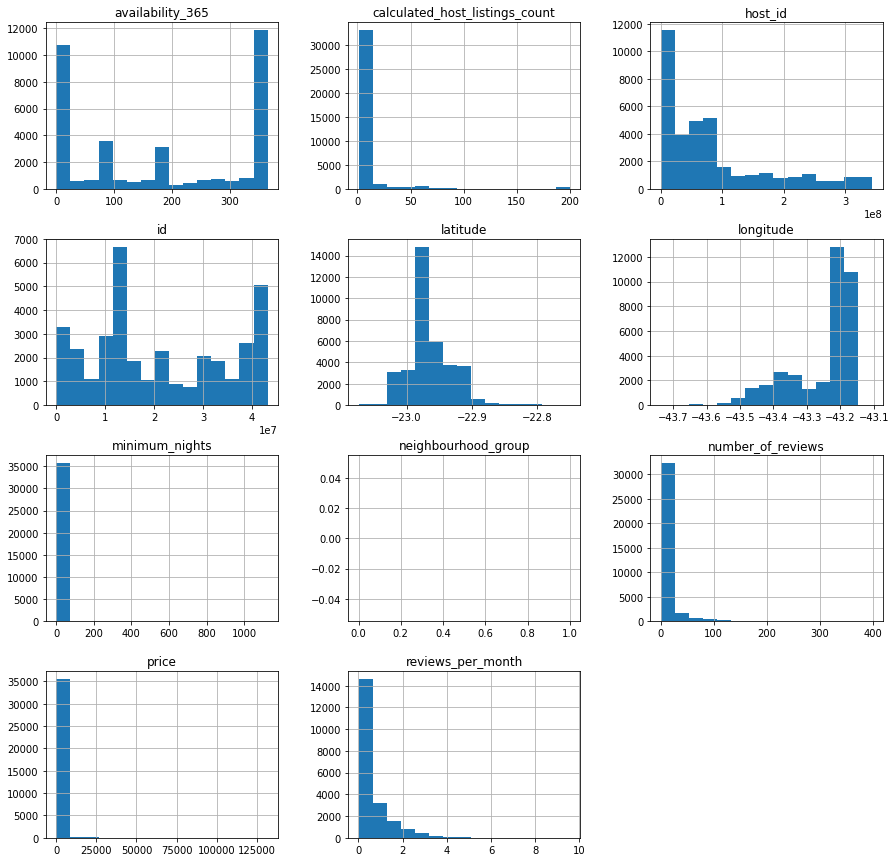

In [6]:
# Contrução dos histogramas das variáveis do dataset.

df.hist(bins=15, figsize=(15,15));

**Quanto à questão da presença de outliers, em uma rápida análise podemos identificar que:** 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Veja por exemplo as variáveis **`price`**, **`minimum_nights`** e **`calculated_host_listings_count`**. Os valores não seguem uma distruição, e distorcem toda a representação gráfica.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.


In [7]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* A variável **`price`** possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
* A quantidade mínima de noites (**`minimum_nights`**) está acima de 365 dias no ano.

Ambos os exemplos apontam para presença de outliers.  

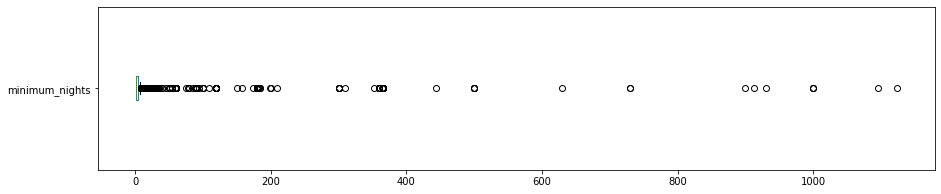

minimum_nights: valores acima de 30:
224 entradas
0.6245%


In [8]:
# Construção do Boxplot para variável minimum_nights.

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificar a quantidade de valores acima de 30 dias para variável minimum_nights.

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

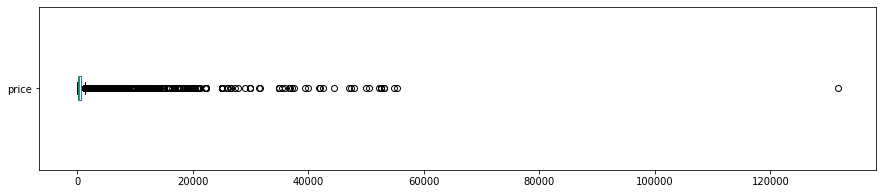


price: valores acima de 1500
3360 entradas
9.3672%


In [9]:
# Construção do Boxplot para variável price.

df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Verificar a quantidade de valores acima R$ 1500,00 para variável price.

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Quanto à construção dos Boxplots para verificar a presença de outliers, podemos verificar que:**

* Considerando-se a variável **minimum_nights** que apresenta menos de 1% de valores acima de 30 dias de permanência nos imóveis locados, mas que causa um enorme impacto na média dos valores da variável, sendo forte candidata a ter seus valores transformados na etapa de preparação de dados.

* Já na variável **price** identificamos quase 10% de valores de imóveis com valores acima de R$ 1500,00 o que pode estar distorcendo a média e mediana da distribuição, constituindo-se em forte candidato a receber tratamento na etapa de preparação dos dados.

### **C. Preparando os Dados:** 

Nesta etapa estaremos limpando os dados, integrando os dados, formatando os dados, construindo novos dados, para enfim, selecionar os dados que serão utilizados na construção de nosso modelo (análise exploratória de dados).

##### **C1.Limpeza dos Dados**

Nesta etapa buscou-se remover os outliers identificados no dataset inicial para se plotar novamente os histogramas, bem como podermos calcular novamente as estatísticas descritivas no novo conjunto de dados.

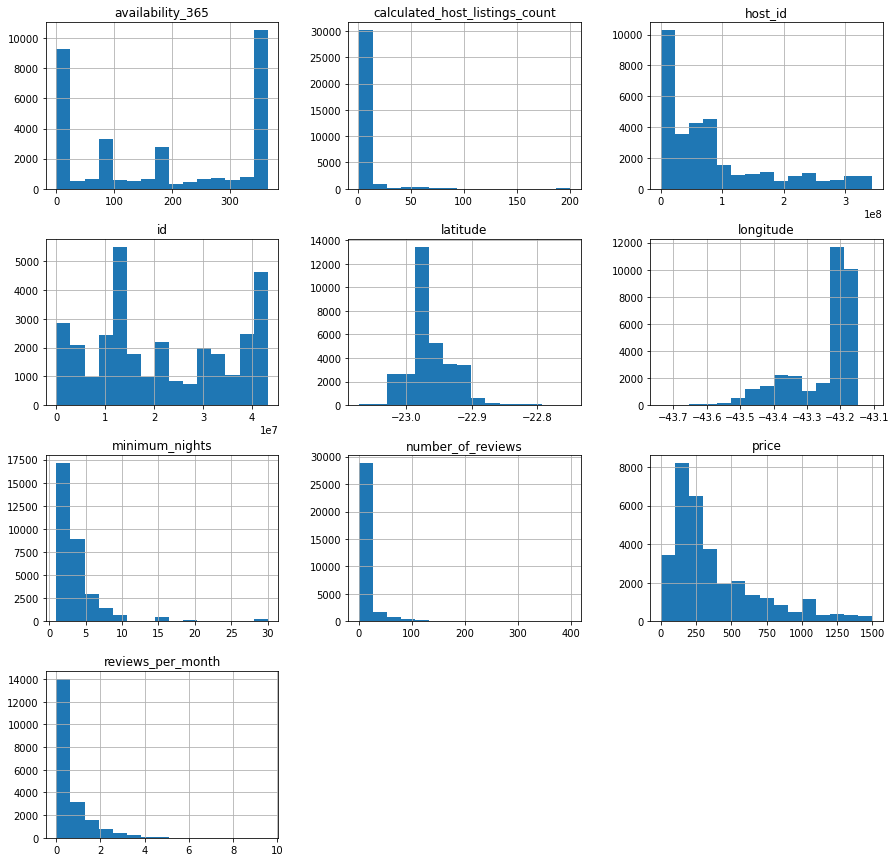

In [11]:
# Buscou-se remover os outliers na construção de um novo dataset.

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Buscou-se remover a variável `neighbourhood_group`, pois encontra-se vazia.

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# E na sequência buscou-se plotar novamente o histograma para as variáveis numéricas.

df_clean.hist(bins=15, figsize=(15,15));

**Quanto ao novo conjunto de dados (df_clean), podemos verificar que:**

* Conseguimos identificar uma clara distribuição de valores nos histogramas das variáveis  **minimum_nights** e **price** sem a presença de outliers.

* Buscou-se eliminar a variável numérica **neighbourhood_group** pois a mesma não agregava valor ao conjunto de dados.

##### **C2.Correlação dos Dados**

Nesta etapa vamos selecionar quais colunas, variáveis ou features serão selecionadas para comporem o nosso modelo de DS considerando suas importâncias no conjunto de dados. Vamos utilizar uma técnica de correlação estatísitica sobre as variáveis numéricas.

In [12]:
# Construiu-se uma matriz de correlação entre as variáveis numéricas dataset df_clean.

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


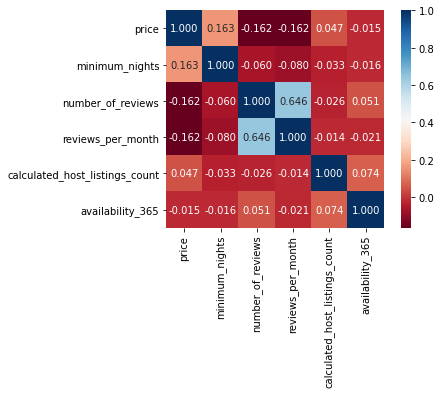

In [14]:
# Na sequência buscou-se construir um mapa de calor (heatmap) a partir dessa matriz.

sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);


**Quanto matriz de correlação e o mapa de calor, podemos verificar que:**

* Conseguimos identificar na matriz e mapa de calor as correlação entre as variáveis plotadas duas a duas nos gráficos, ficando claro que o intervalo de análise varia de (-1 a +1) com forte correlação positiva ou negativa entre variáveis para valores próximos de (+1 ou -1), bem como fraca correlação para valores próximos de (0).

* No presente caso identificamos baixa correlação (0) entre as variáveis em análise, com exceção das variáveis numéricas **number_of_reviews** e **reviews_por_month)** que apresentam uma correlação positiva bastante interessante **(0.646)**.

### **D. Construindo o Modelo de DS**: 

Nesta etapa serão selecionadas técnicas de modelagem em Data Science, gerando um design de teste, construindo possíveis modelos para DS como modelos de  machine learning, deep learning, inteligência artificial, visualização de dados (tabelas, gráficos, BI), dentre outras várias técnicas, e por fim, o modelo será avaliado quanto à qualidade das suas previsões (métricas de avaliação do modelo).

##### **D1. Visualização dos Dados - Problemas Investigados no Projeto**

* Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
* Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
* Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
* Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
* Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?



**Ranking do principais tipos de imóveis locados na cidade do Rio de Janeiro?**

In [16]:
# Identificando a quantidade de imóveis por tipo de imóvel disponível. Foi utilizado o método value_counts().

df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [17]:
# Verificando o percentual de cada tipo de imóvel no total do conjunto de dados.

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.693798
Private room       0.277575
Shared room        0.023675
Hotel room         0.004952
Name: room_type, dtype: float64

**Quanto aos tipos de imóveis mais locados, podemos verificar que:**

* A coluna da variável categórica **room_type** indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de **espaço inteiro**(apartamentos/casas), **quarto inteiro**, **quarto compartilhado** e  **quarto de hotel**.

* Numa simples análise podemos verificar quase 70% dos imóveis locados pela AirBnb na cidade do Rio de Janeiro estão na categoria de **espaços inteiros** de casa e ou apartamentos (tenha um lugar só para você).

* Na sequência com quase 28% temos os **quartos inteiros** (tenha seu próprio quarto e compartilhe alguns espaços comuns).

* Na categoria de **quartos compartilhados** (fique em um espaço compartilhado, como um quarto comum) temos próximo de 2,3%.

* E por fim, temos **quarto de hotal** (fique em um quarto inteiro ou compartilhado em um hotel boutique, albergue e outros lugares) com ínfimos 0,4%.

In [19]:
# Construindo uma análise de uma varíavel (neighbourhood) em função de outra varíavel (price) usando a função groupby.

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Engenho de Dentro         470.861111
Barra da Tijuca           470.478194
Inhoaíba                  466.000000
Jacarepaguá               465.080763
Maracanã                  461.579767
Name: price, dtype: float64

**Quanto aos bairros com maior custo de locação do imóvel, podemos verificar que:**

* A coluna da variável numérica **price** indica o preço para alugar o imóvel na Airbnb. Dessa forma, combinando os valores da variável **price** com os valores da variável **neighbourhood** podemos encontrar os valores médios por bairro na cidade do Rio de Janeiro com uso da função groupby.

* No output acima, podemos identificar que bairros como Vaz Lobo, Engenheiro Leal, Ricardo de Albuquerque e Paciência, estão com média de preço de locação superior a de lugares como Lagoa, Leblon e Barra da Tijuca. O que soa estranho para alguém que conheça os principais pontos turisticos da cidade do Rio de Janeiro. 

* O que nos leva a necessidade **insvestigarmos novamente** nossa base de dados para verificar a representatividade das amostras de bairros como Vaz Lobo, Engenheiro Leal, Ricardo de Albuquerque e Paciência no conjunto de toda base de dados. **O que sinaliza que a metodologia CRISP-DM apesar de dividida em etapas e construída de forma sequêncial, deve ser aplicada de forma interativa e recorrendo.** No caso em tela fica claro que teríamos que voltar na fase de **preparação dos dados** para aplicação de técnicas de limpeza e transformação de dados para minimizar as ocorrências identificadas.


### **E. Avaliando os Resultados do Projeto de DS:** 

Avaliando os resultados e processo de revisão.

### **F. Implementação:** 

Planejamento da implementação, planejamento do monitoramento e a manutenção da solução, produzir um relatório final.

### **Conclusões**

### **Referências**

Melo. Carlos. Curso Sigmoidal: Data Science na Prática 2.0.2020.

P. Chapman, J. Clinton, R. Kerber, T. Khabaza, T. Reinartz, C. Shearer,
and R. Wirth, “Crisp–dm 1.0 step-by-step data mining guide,” 2000.